#Regression - Yes Bank Stock Closing Price Prediction

##Business Context
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

##Business Objective
The primary business objective of this project is to analyze the stock price movement of Yes Bank using EDA techniques and derive insights to help stakeholders make informed financial decisions. The findings will help traders, investors, and financial analysts understand market trends and improve investment strategies.

Key Objectives:

1) Understand Stock Price Trends: Examine historical price changes over time.

2) Detect Anomalies and Volatility: Identify sudden price fluctuations and external factors affecting them.

3) Identify Correlation Among Features: Explore relationships between Open, High, Low, Close, and Volume.

4) Extract Actionable Insights: Provide meaningful recommendations for investment strategies.

###GITHUB LINK- https://github.com/ManthanBohra/YES-BANK-Stock-Prices-Prediction

#KNOW YOUR DATA

###IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

Pandas: Used for data manipulation and handling tabular data.<br>
 NumPy: Used for numerical operations like calculating RMSE.<br>
 Matplotlib & Seaborn: Used for visualizing stock price trends and model predictions.<br>
 Scikit-Learn: Used for data splitting, model training, and performance evaluation.<br>

In [ ]:
# Load dataset
df = pd.read_csv("data_YesBank_StockPrices.csv")
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
# Check for duplicate values
duplicate_values = df.duplicated().sum()
duplicate_values

0

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


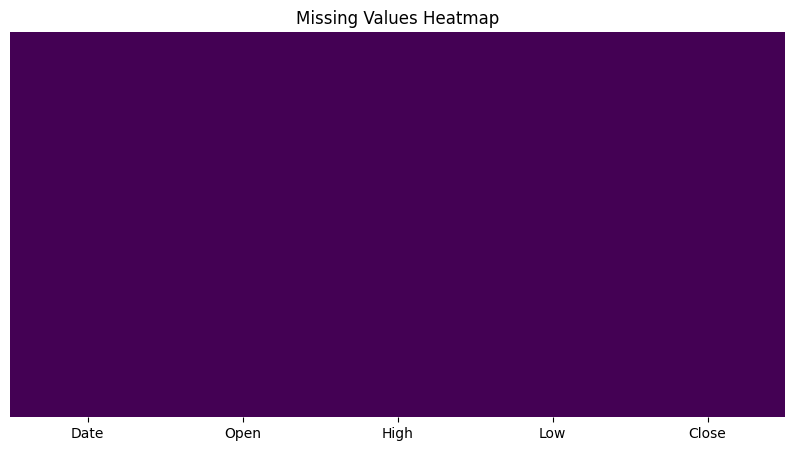

In [ ]:
# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by='Date')
df.set_index('Date', inplace=True)

In [ ]:
df

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15


 1)Convert 'Date' to datetime format from string format <br>
 2)Sorts the dataset by date to maintain chronological order.<br>
 3)Sets Date as the index, making it suitable for time-series analysis.

In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0


Check if data has a null value or not.

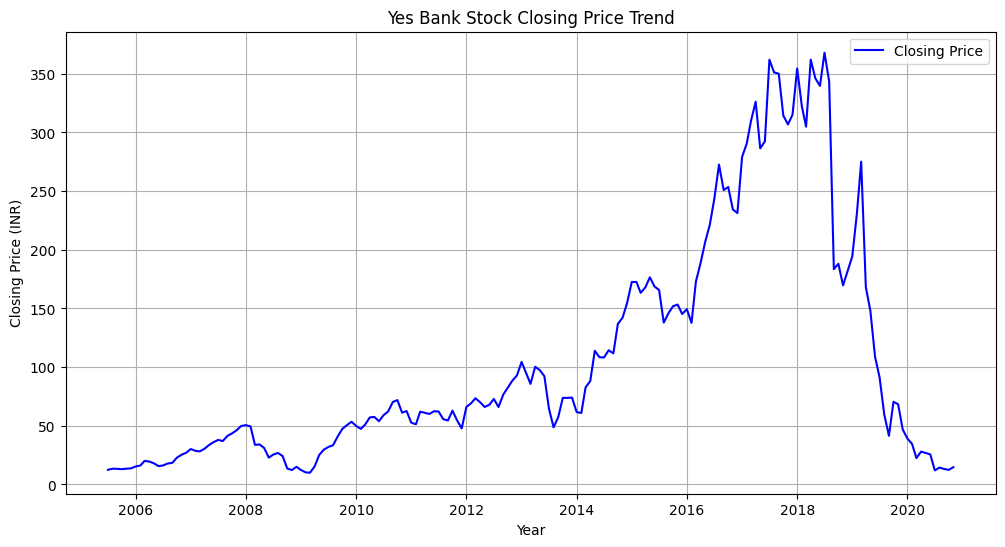

In [ ]:
# Data visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Close', label='Closing Price', color='blue')
plt.xlabel('Year')
plt.ylabel('Closing Price (INR)')
plt.title('Yes Bank Stock Closing Price Trend')
plt.legend()
plt.grid()
plt.show()

##The plot shows the trend of Yes Bank's closing stock price over time. Key observations:

Initial Growth (2005-2018): The stock price showed a strong upward trend.<br>
Sharp Decline (2018 Onward): Around 2018, there was a steep decline, likely linked to the fraud case.<br>
Volatility: The stock exhibits fluctuations, indicating a need for proper modeling techniques.

In [ ]:
# Feature Engineering

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Prev_Close'] = df['Close'].shift(1)
df['Price_Change'] = df['Close'] - df['Prev_Close']
df.dropna(inplace=True)
df

,Open,High,Low,Close,Year,Month,Prev_Close,Price_Change
Date,,,,,,,,
2005-09-01,13.48,14.87,12.27,13.30,2005,9,13.42,-0.12
2005-10-01,13.20,14.47,12.40,12.99,2005,10,13.30,-0.31
2005-11-01,13.35,13.88,12.88,13.41,2005,11,12.99,0.42
2005-12-01,13.49,14.44,13.00,13.71,2005,12,13.41,0.30
2006-01-01,13.68,17.16,13.58,15.33,2006,1,13.71,1.62
...,...,...,...,...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95,2020,7,25.60,-13.65
2020-08-01,12.00,17.16,11.85,14.37,2020,8,11.95,2.42
2020-09-01,14.30,15.34,12.75,13.15,2020,9,14.37,-1.22


Feature Engineering is the process of creating new meaningful features from raw data to improve a machine learning model’s performance. It involves transforming, extracting, and creating new variables to enhance the dataset’s predictive power.

Extracts the Year and Month from the Date column to identify seasonal trends.<br>
Creates a "Prev_Close" feature (previous month's closing price) using .shift(1).<br>
Computes "Price_Change" to understand how much the stock price fluctuates each month.<br>
Drops missing values caused by shifting.<br>

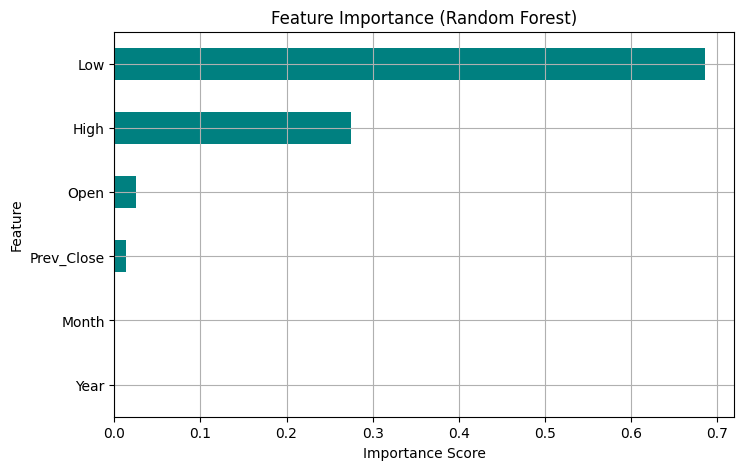

In [ ]:
feature_importance = pd.Series(model.feature_importances_, index=features)
plt.figure(figsize=(8, 5))
feature_importance.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.grid()
plt.show()

Feature Importance → Identify which features contribute most to stock price predictions.

In [ ]:
# Prepare data for training
from sklearn.model_selection import train_test_split
features = ['Open', 'High', 'Low', 'Prev_Close', 'Year', 'Month']
target = 'Close'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selects features (independent variables) to train the model:<br>
Open, High, Low → Stock price details.<br>
Prev_Close → Helps capture price momentum.<br>
Year, Month → Captures trends over time.<br>
Sets the target variable (Close) → The stock price we want to predict.<br>
Splits the data into training (80%) and testing (20%) sets.<br>

In [ ]:
# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Uses RandomForestRegressor, a machine learning algorithm that creates multiple decision trees and averages their outputs for better accuracy.

In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_pred

array([ 27.7301,  13.1976, 352.5636, 147.696 , 313.9025,  23.9034,
        34.2863,  63.1987, 167.6236,  66.6955,  63.4185, 191.8146,
        60.3212,  39.6393,  19.0133,  26.5458,  48.7996,  25.8789,
        67.4047,  53.6756, 209.5572, 151.0256, 347.7178,  48.6606,
        19.2535, 149.466 ,  62.8275,  29.7697,  59.6728, 167.5293,
        56.5146,  49.9442, 167.1837, 241.9602,  50.4985,  43.906 ,
        58.8813])

In [ ]:
print(y_pred[1])  # Accessing the first prediction


13.197600000000005


Uses the trained Random Forest model to predict closing prices for the test dataset

In [ ]:
# Evaluate model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MAE: 7.573786486486492
MSE: 182.30822242189248
RMSE: 13.502156213801278
R2 Score: 0.9775744877296995


Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted prices.<br>
Mean Squared Error (MSE): Measures squared differences (penalizes larger errors more).<br>
Root Mean Squared Error (RMSE): The square root of MSE, representing error in actual price units.<br>
R² Score: Measures how well the model explains variance (closer to 1 = better).

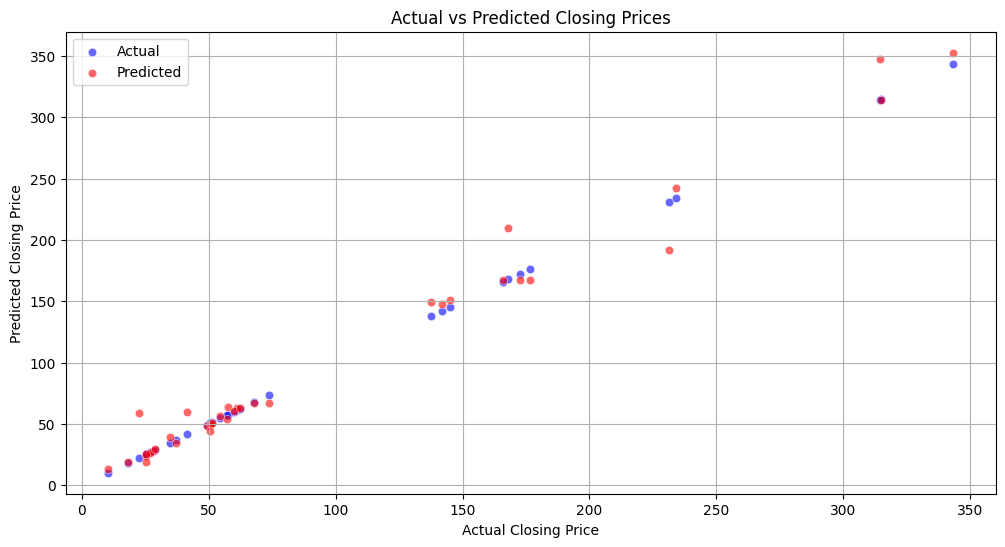

In [ ]:
plt.figure(figsize=(12, 6))

# Scatter plot for actual values
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual', alpha=0.6)

# Scatter plot for predicted values
sns.scatterplot(x=y_test, y=y_pred, color='red', label='Predicted', alpha=0.6)

plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.grid()
plt.show()


Uses Seaborn's scatter plot to compare actual vs. predicted prices.<br>
A perfect model would align all points along the diagonal (y = x)

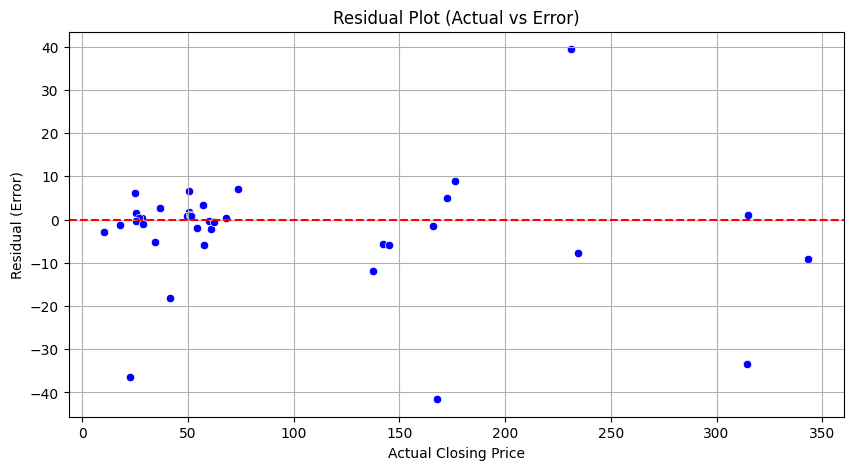

In [ ]:
# 1. Residual Plot (Errors in Predictions)
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Closing Price")
plt.ylabel("Residual (Error)")
plt.title("Residual Plot (Actual vs Error)")
plt.grid()
plt.show()

A residual plot visualizes prediction errors by plotting actual values against residuals (errors). Ideally, residuals should be randomly scattered around zero, indicating a well-fitted model. Patterns suggest missing trends, while increasing spread indicates variance issues. It helps detect bias, non-linearity, and model inadequacies for improvement

#Summary of What the Code Does
✅ Loads and preprocesses Yes Bank stock price data<br>
✅ Visualizes stock price trends using Matplotlib & Seaborn<br>
✅ Creates new features for better prediction<br>
✅ Trains a Random Forest model to predict closing prices<br>
✅ Evaluates model performance with error metrics<br>
✅ Plots actual vs. predicted values for analysis

#THE END